In [42]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [43]:
#read the CSV file into a dataframe
df= pd.read_csv('pG_savitski_no_remap_100.csv')

#select columns that you want to keep 
columns_to_keep=['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df) 
new_df.to_csv('ProteinIDs_savitski_no_remap_100_withScore.csv', index=False)

                        Protein IDs   Q-value     Score
0              sp|P35579|MYH9_HUMAN  0.000285  4.000000
1             sp|O75477|ERLN1_HUMAN  0.000285  3.999996
2              sp|P05121|PAI1_HUMAN  0.000285  3.999996
3             sp|Q8WVM8|SCFD1_HUMAN  0.000285  3.999991
4             sp|P46821|MAP1B_HUMAN  0.000285  3.999987
...                             ...       ...       ...
20303  REV__sp|Q9UPT5-4|EXOC7_HUMAN  0.515409  0.302530
20304       sp|Q9BUR5-2|MIC26_HUMAN  0.515409  0.302434
20305       sp|Q9Y6A2-3|CP46A_HUMAN  0.515409  0.302400
20306    REV__sp|Q9BZA8|PC11Y_HUMAN  0.515484  0.302207
20307  REV__sp|Q6ISS4-2|LAIR2_HUMAN  0.515559  0.301630

[20308 rows x 3 columns]


In [44]:
df = pd.read_csv('ProteinIDs_savitski_no_remap_100_withScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_savitski_no_remap_100_withScore.csv')

        Q-value Protein Type Protein Uniprot Protein Label
0      0.000285           sp          P35579    MYH9_HUMAN
1      0.000285           sp          O75477   ERLN1_HUMAN
2      0.000285           sp          P05121    PAI1_HUMAN
3      0.000285           sp          Q8WVM8   SCFD1_HUMAN
4      0.000285           sp          P46821   MAP1B_HUMAN
...         ...          ...             ...           ...
20303  0.515409      REV__sp        Q9UPT5-4   EXOC7_HUMAN
20304  0.515409           sp        Q9BUR5-2   MIC26_HUMAN
20305  0.515409           sp        Q9Y6A2-3   CP46A_HUMAN
20306  0.515484      REV__sp          Q9BZA8   PC11Y_HUMAN
20307  0.515559      REV__sp        Q6ISS4-2   LAIR2_HUMAN

[20308 rows x 4 columns]


sp         11762
REV__sp     5282
REV__sR      857
sR           835
REV__pI      644
pI           624
sU           110
REV__sU       86
nC            69
REV__nC       39
Name: Protein Type, dtype: int64


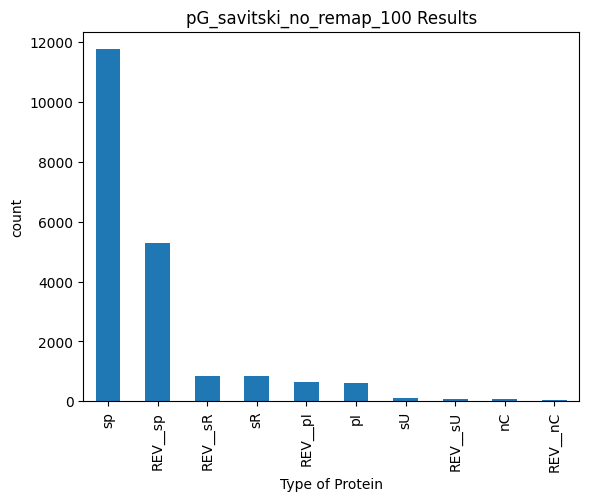

In [45]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap_100_withScore.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_savitski_no_remap_100 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI       2
REV__sR       1
REV__sp      56
pI            2
sR            4
sU            1
sp         6030
Name: Protein Type, dtype: int64


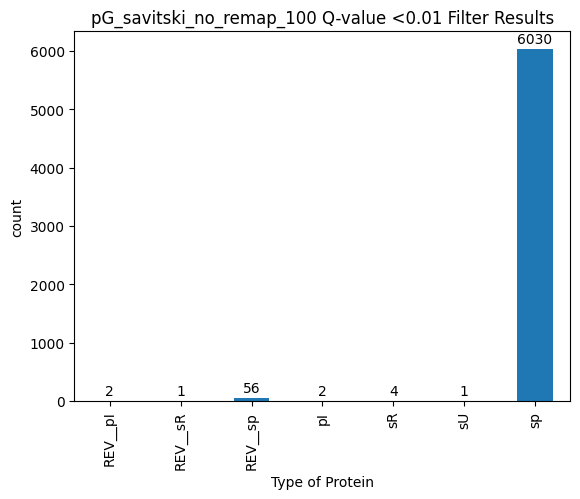

In [46]:
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap_100_withScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_savitski_no_remap_100 Q-value <0.01 Filter Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          

In [47]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       2
REV__sR       1
REV__sp      56
pI            2
sR            4
sU            1
sp         6030
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      39
REV__pI     642
REV__sR     856
REV__sU      86
REV__sp    5226
nC           69
pI          622
sR          831
sU          109
sp         5732
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60513/2588170995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60513/2588170995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

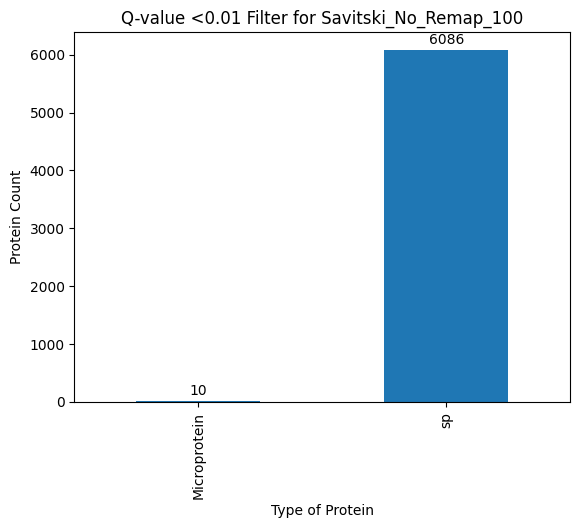

In [48]:

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Savitski_No_Remap_100')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value filter

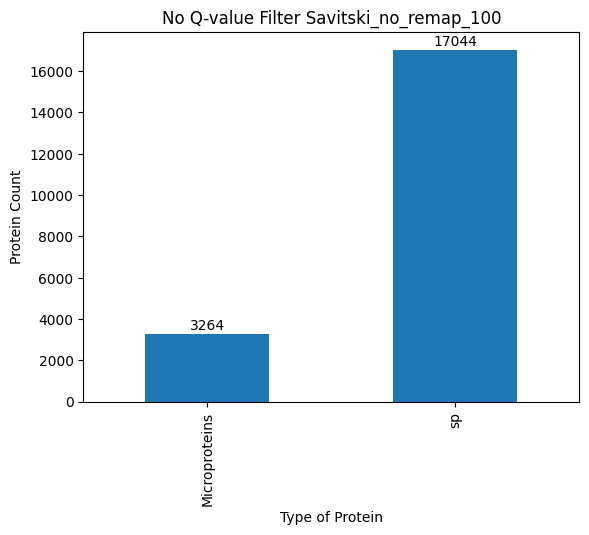

In [49]:
# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Savitski_no_remap_100')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()